#### Ecoli Dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pylab as plt
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)


In [2]:
df = pd.read_csv('ecoli.csv')
df.head()

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [3]:
del df['SEQUENCE_NAME']
df.head()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [4]:
df['SITE'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: SITE, dtype: int64

### Most of the dataset's samples fall within the 'cp'(cytoplasm), 'im'(inner membrane without signal sequence)

##### To remove all the classes except for cp and im

In [5]:
cl_array = ['pp','imU','om','omL','imL','imS']

In [6]:
# Deleting  all the rows except for cp and im
df = df[~df['SITE'].isin(cl_array)]

In [7]:
df['SITE'].value_counts()

cp    143
im     77
Name: SITE, dtype: int64

In [8]:
df.SITE.replace(('cp', 'im'),(1,0), inplace=True) 

In [9]:
print("Shape:", df.shape)

print("Data Types: \n", df.dtypes)

Shape: (220, 8)
Data Types: 
 MCG     float64
GVH     float64
LIP     float64
CHG     float64
AAC     float64
ALM1    float64
ALM2    float64
SITE      int64
dtype: object


In [10]:
df.head()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


In [11]:
df.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
count,220.000000,220.000000,220.000000,220.0,220.000000,220.000000,220.000000,220.000000
mean,0.403773,0.440136,0.482364,0.5,0.483045,0.468364,0.512545,0.650000
std,0.161516,0.098173,0.035058,0.0,0.105143,0.235186,0.203211,0.478057
min,0.000000,0.160000,0.480000,0.5,0.000000,0.030000,0.000000,0.000000
25%,0.290000,0.370000,0.480000,0.5,0.420000,0.280000,0.367500,0.000000
50%,0.400000,0.440000,0.480000,0.5,0.480000,0.375000,0.440000,1.000000
75%,0.510000,0.502500,0.480000,0.5,0.552500,0.710000,0.710000,1.000000
max,0.890000,0.760000,1.000000,0.5,0.740000,1.000000,0.990000,1.000000


# Features & Label

In [12]:
X=df.drop('SITE',axis=1)
y=df['SITE']

In [13]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model 1

In [14]:
# create model. (20-10-5) if all the classes included.

model = Sequential()
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [15]:
 # Compile model
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=2)

Epoch 1/200
18/18 - 1s - loss: 0.6968 - accuracy: 0.3466
Epoch 2/200
18/18 - 0s - loss: 0.6880 - accuracy: 0.7557
Epoch 3/200
18/18 - 0s - loss: 0.6837 - accuracy: 0.8409
Epoch 4/200
18/18 - 0s - loss: 0.6797 - accuracy: 0.8920
Epoch 5/200
18/18 - 0s - loss: 0.6763 - accuracy: 0.9091
Epoch 6/200
18/18 - 0s - loss: 0.6728 - accuracy: 0.8920
Epoch 7/200
18/18 - 0s - loss: 0.6691 - accuracy: 0.9034
Epoch 8/200
18/18 - 0s - loss: 0.6655 - accuracy: 0.9091
Epoch 9/200
18/18 - 0s - loss: 0.6616 - accuracy: 0.9091
Epoch 10/200
18/18 - 0s - loss: 0.6575 - accuracy: 0.9205
Epoch 11/200
18/18 - 0s - loss: 0.6530 - accuracy: 0.9261
Epoch 12/200
18/18 - 0s - loss: 0.6490 - accuracy: 0.9375
Epoch 13/200
18/18 - 0s - loss: 0.6436 - accuracy: 0.9432
Epoch 14/200
18/18 - 0s - loss: 0.6390 - accuracy: 0.9489
Epoch 15/200
18/18 - 0s - loss: 0.6336 - accuracy: 0.9716
Epoch 16/200
18/18 - 0s - loss: 0.6279 - accuracy: 0.9716
Epoch 17/200
18/18 - 0s - loss: 0.6223 - accuracy: 0.9773
Epoch 18/200
18/18 - 0s

Epoch 142/200
18/18 - 0s - loss: 0.1491 - accuracy: 0.9830
Epoch 143/200
18/18 - 0s - loss: 0.1478 - accuracy: 0.9830
Epoch 144/200
18/18 - 0s - loss: 0.1463 - accuracy: 0.9830
Epoch 145/200
18/18 - 0s - loss: 0.1452 - accuracy: 0.9830
Epoch 146/200
18/18 - 0s - loss: 0.1453 - accuracy: 0.9830
Epoch 147/200
18/18 - 0s - loss: 0.1429 - accuracy: 0.9830
Epoch 148/200
18/18 - 0s - loss: 0.1418 - accuracy: 0.9830
Epoch 149/200
18/18 - 0s - loss: 0.1412 - accuracy: 0.9830
Epoch 150/200
18/18 - 0s - loss: 0.1402 - accuracy: 0.9830
Epoch 151/200
18/18 - 0s - loss: 0.1385 - accuracy: 0.9830
Epoch 152/200
18/18 - 0s - loss: 0.1382 - accuracy: 0.9830
Epoch 153/200
18/18 - 0s - loss: 0.1362 - accuracy: 0.9830
Epoch 154/200
18/18 - 0s - loss: 0.1352 - accuracy: 0.9830
Epoch 155/200
18/18 - 0s - loss: 0.1341 - accuracy: 0.9830
Epoch 156/200
18/18 - 0s - loss: 0.1328 - accuracy: 0.9830
Epoch 157/200
18/18 - 0s - loss: 0.1319 - accuracy: 0.9830
Epoch 158/200
18/18 - 0s - loss: 0.1313 - accuracy: 0.98

In [17]:
y_pred = np.round(model.predict(X_test),0) 
# rounding off the y_prediction to get 1(cp) or 0(im)

In [18]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15  1]
 [ 0 28]]


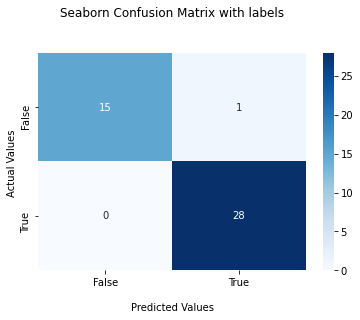

In [19]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        28

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



In [21]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

2/2 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9773
Model loss on the test set: 0.12523646652698517
Model accuracy on the test set: 97.73%


# Model2 

In [39]:
# reference paper for below model(7-15-8) @ https://www.ijltet.org/journal/15881228132.3062.pdf

# create model
model2 = Sequential()
model2.add(Dense(7, input_dim=7, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


In [40]:
model2.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model2.fit(X_train, y_train, epochs=200, batch_size=10, verbose=2)

Epoch 1/200
18/18 - 1s - loss: 0.6922 - accuracy: 0.5739
Epoch 2/200
18/18 - 0s - loss: 0.6769 - accuracy: 0.9375
Epoch 3/200
18/18 - 0s - loss: 0.6651 - accuracy: 0.9489
Epoch 4/200
18/18 - 0s - loss: 0.6513 - accuracy: 0.9659
Epoch 5/200
18/18 - 0s - loss: 0.6320 - accuracy: 0.9659
Epoch 6/200
18/18 - 0s - loss: 0.6057 - accuracy: 0.9659
Epoch 7/200
18/18 - 0s - loss: 0.5748 - accuracy: 0.9659
Epoch 8/200
18/18 - 0s - loss: 0.5459 - accuracy: 0.9318
Epoch 9/200
18/18 - 0s - loss: 0.5092 - accuracy: 0.9716
Epoch 10/200
18/18 - 0s - loss: 0.4746 - accuracy: 0.9659
Epoch 11/200
18/18 - 0s - loss: 0.4370 - accuracy: 0.9716
Epoch 12/200
18/18 - 0s - loss: 0.3994 - accuracy: 0.9716
Epoch 13/200
18/18 - 0s - loss: 0.3632 - accuracy: 0.9773
Epoch 14/200
18/18 - 0s - loss: 0.3276 - accuracy: 0.9830
Epoch 15/200
18/18 - 0s - loss: 0.2949 - accuracy: 0.9773
Epoch 16/200
18/18 - 0s - loss: 0.2660 - accuracy: 0.9773
Epoch 17/200
18/18 - 0s - loss: 0.2408 - accuracy: 0.9773
Epoch 18/200
18/18 - 0s

Epoch 142/200
18/18 - 0s - loss: 0.0477 - accuracy: 0.9886
Epoch 143/200
18/18 - 0s - loss: 0.0499 - accuracy: 0.9886
Epoch 144/200
18/18 - 0s - loss: 0.0478 - accuracy: 0.9886
Epoch 145/200
18/18 - 0s - loss: 0.0483 - accuracy: 0.9886
Epoch 146/200
18/18 - 0s - loss: 0.0495 - accuracy: 0.9886
Epoch 147/200
18/18 - 0s - loss: 0.0486 - accuracy: 0.9886
Epoch 148/200
18/18 - 0s - loss: 0.0507 - accuracy: 0.9886
Epoch 149/200
18/18 - 0s - loss: 0.0493 - accuracy: 0.9886
Epoch 150/200
18/18 - 0s - loss: 0.0509 - accuracy: 0.9886
Epoch 151/200
18/18 - 0s - loss: 0.0480 - accuracy: 0.9886
Epoch 152/200
18/18 - 0s - loss: 0.0501 - accuracy: 0.9886
Epoch 153/200
18/18 - 0s - loss: 0.0522 - accuracy: 0.9886
Epoch 154/200
18/18 - 0s - loss: 0.0533 - accuracy: 0.9886
Epoch 155/200
18/18 - 0s - loss: 0.0503 - accuracy: 0.9886
Epoch 156/200
18/18 - 0s - loss: 0.0496 - accuracy: 0.9886
Epoch 157/200
18/18 - 0s - loss: 0.0545 - accuracy: 0.9886
Epoch 158/200
18/18 - 0s - loss: 0.0499 - accuracy: 0.98

In [34]:
# Evaluating the model on the test set
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

2/2 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9773
Model loss on the test set: 0.0627438947558403
Model accuracy on the test set: 97.73%


In [35]:
y_pred = np.round(model2.predict(X_test),0)

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15  1]
 [ 0 28]]


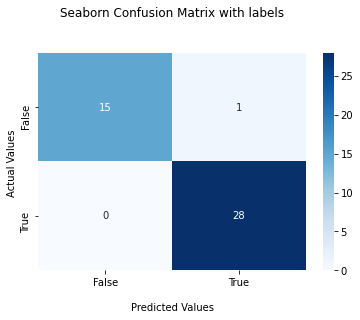

In [37]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        28

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44

